# Insurance CROSS SELL 

### 1. Importing libraries  and loading dataset

In [1]:
# import necessary libraries 

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from tqdm import tqdm
import os

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [3]:
# load train data in pandas dataframe
train_data = pd.read_csv('data/train.csv')
# load test data in pandas dataframe
test_data = pd.read_csv('data/test.csv')

In [4]:
# shape of train and test data 
print(train_data.shape)
print(test_data.shape)

(381109, 12)
(127037, 11)


In [5]:
# display first few rows of train data 
train_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
5,6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0
6,7,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0
7,8,Female,56,1,28,0,1-2 Year,Yes,32031,26,72,1
8,9,Female,24,1,3,1,< 1 Year,No,27619,152,28,0
9,10,Female,32,1,6,1,< 1 Year,No,28771,152,80,0


In [6]:
# display test data 
test_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


In [7]:
# columns info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [9]:
# unique rows in each column
train_data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [10]:
# check if there are any null values in train data 
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
# check if there are any null values in test data
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [12]:
# check for imbalance in data 
train_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

There is high imbalance in data as expected.

### 2. Exploratory Data Analysis 

#### 2.1. Gender 

In [13]:
# train data
train_data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [14]:
print("Males interested in insurance % :", train_data[(train_data['Gender'] == 'Male') &  
    (train_data['Response'] == 1)]['id'].count()*100/train_data[train_data['Gender'] == 'Male']['id'].count())

print("Females interested in insurance % :", train_data[(train_data['Gender'] == 'Female') &  
    (train_data['Response'] == 1)]['id'].count()*100/train_data[train_data['Gender'] == 'Female']['id'].count())

Males interested in insurance % : 13.841107482689518
Females interested in insurance % : 10.390241115301109


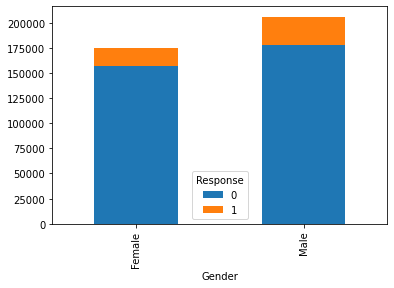

In [15]:
train_data.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [16]:
# test data
test_data['Gender'].value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

#### 2.2 Age

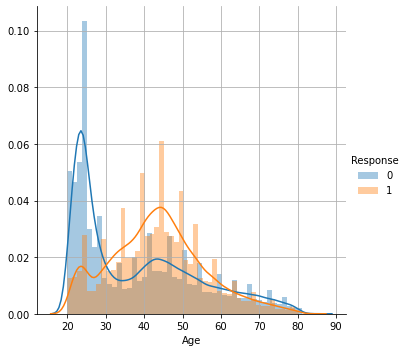

In [17]:
# how does age influence response 

sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Age').add_legend()
plt.grid()
plt.show()

In [18]:
train_data['Age'].value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

#### 2.3. Driving License 

In [19]:
# train data 
train_data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [20]:
train_data.groupby(['Driving_License', 'Response']).size().unstack()

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


In [21]:
# test data 
test_data['Driving_License'].value_counts()

1    126800
0       237
Name: Driving_License, dtype: int64

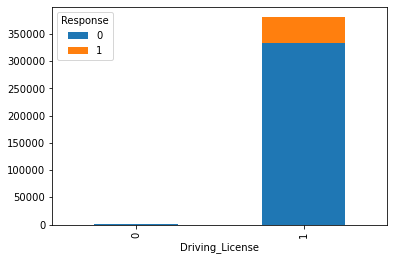

In [22]:
train_data.groupby(['Driving_License', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

#### 2.4. Region Code

In [25]:
# train data 
train_data['Region_Code'].value_counts()

28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
45      5605
37      5501
18      5153
48      4681
14      4678
39      4644
10      4374
21      4266
2       4038
13      4036
7       3279
12      3198
9       3101
27      2823
32      2787
43      2639
17      2617
26      2587
25      2503
24      2415
38      2026
0       2021
16      2007
23      1960
31      1960
20      1935
49      1832
4       1801
34      1664
19      1535
22      1309
40      1295
5       1279
1       1008
44       808
42       591
52       267
51       183
Name: Region_Code, dtype: int64

In [26]:
# test data 
test_data['Region_Code'].value_counts()

28.0    35522
8.0     11023
46.0     6608
41.0     6137
15.0     4442
30.0     4085
29.0     3778
50.0     3414
3.0      3098
11.0     3096
36.0     2899
33.0     2653
47.0     2506
35.0     2367
6.0      2071
45.0     1938
37.0     1842
18.0     1750
48.0     1593
14.0     1571
39.0     1494
10.0     1473
21.0     1405
2.0      1360
13.0     1360
12.0     1037
7.0      1034
9.0       983
32.0      958
27.0      888
26.0      874
43.0      869
25.0      849
24.0      848
17.0      838
16.0      720
0.0       678
31.0      675
38.0      651
23.0      636
20.0      593
4.0       578
49.0      556
34.0      526
19.0      524
22.0      420
5.0       419
40.0      413
1.0       355
44.0      256
42.0      196
52.0       90
51.0       88
Name: Region_Code, dtype: int64

#### 2.5. Previously insured 

In [27]:
# train data 
train_data.groupby(['Previously_Insured', 'Response']).size().unstack()

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


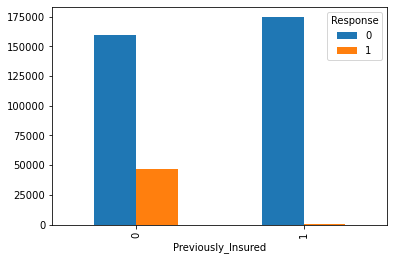

In [28]:
train_data.groupby(['Previously_Insured', 'Response']).size().unstack().plot(kind = 'bar')

#### 2.6. Vehicle Age

In [29]:
# train data 
train_data.groupby(['Vehicle_Age', 'Response']).size().unstack()

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


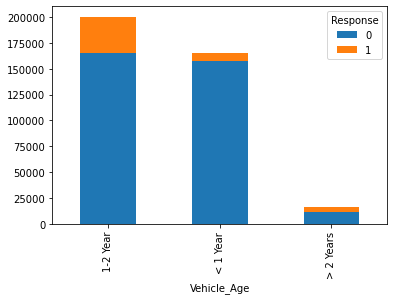

In [30]:
train_data.groupby(['Vehicle_Age','Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

#### 2.7. Vehicle Damage

In [31]:
train_data.groupby(['Vehicle_Damage', 'Response']).size().unstack()

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


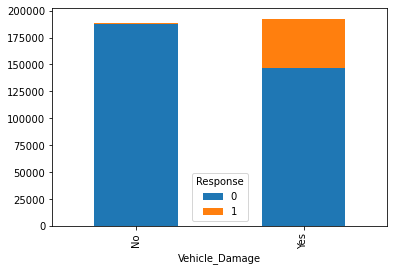

In [32]:
train_data.groupby(['Vehicle_Damage', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

#### 2.8. Annual_Premium

In [33]:
train_data['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [34]:
# 90 - 100 percentile values
np.percentile(train_data['Annual_Premium'], np.arange(90, 101))

array([ 48431.  ,  49412.28,  50505.  ,  51774.  ,  53287.  ,  55176.  ,
        57564.68,  60680.  ,  65380.84,  72963.  , 540165.  ])

In [35]:
# 99.9 percentile
np.percentile(train_data['Annual_Premium'], 99.9)

115554.0

In [36]:
# Test data 
# 90 - 100 percentile values 
np.percentile(test_data['Annual_Premium'], np.arange(90, 101))

array([ 48491.8 ,  49457.  ,  50548.12,  51818.  ,  53307.84,  55218.8 ,
        57503.56,  60603.  ,  65228.96,  72739.  , 472042.  ])

In [37]:
# Test data
# 99.9 percentile
np.percentile(test_data['Annual_Premium'], 99.99)

238893.86319996766

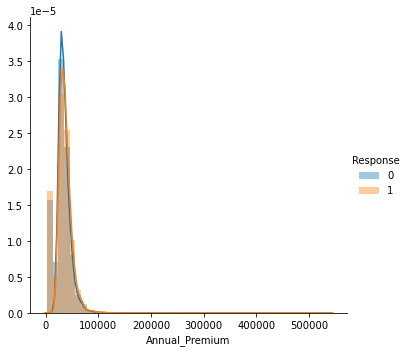

In [38]:
# how does annual premium influence response

sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

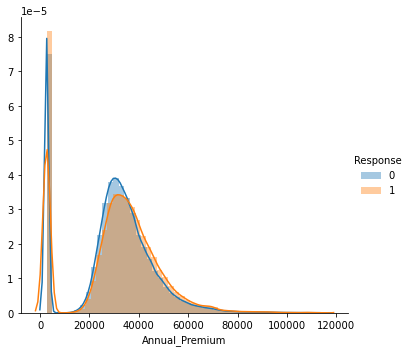

In [39]:
# Consider only upto 99.9 percentile 

sns.FacetGrid(data = train_data[train_data['Annual_Premium'] < np.percentile(train_data['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

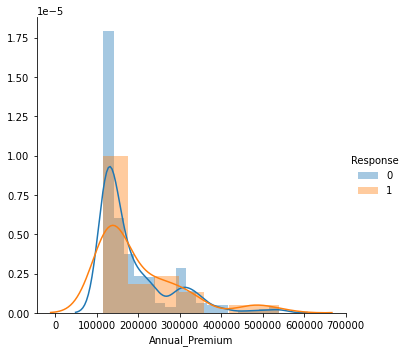

In [40]:
# Beyond 99.9 percentile 

sns.FacetGrid(data = train_data[train_data['Annual_Premium'] >= np.percentile(train_data['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

#### 2.9. Policy_Sales_Channel

In [41]:
train_data['Policy_Sales_Channel'].value_counts()

152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
144         1
123         1
143         1
149         1
84          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [42]:
train_data['Policy_Sales_Channel'].value_counts().values

array([134784,  79700,  73995,  21779,  10661,   9930,   6684,   5993,
         3885,   2893,   1865,   1848,   1598,   1515,   1410,   1264,
         1234,   1203,   1074,   1055,   1026,    888,    843,    783,
          769,    750,    631,    622,    607,    579,    523,    523,
          517,    509,    492,    422,    332,    312,    264,    222,
          185,    184,    175,    174,    169,    167,    158,    154,
          152,    148,    143,    137,    132,    127,    124,    121,
          110,    107,    104,    103,    101,    101,    100,     89,
           85,     77,     75,     72,     68,     65,     64,     63,
           62,     59,     54,     52,     52,     51,     48,     47,
           46,     44,     38,     34,     32,     28,     27,     26,
           24,     23,     23,     22,     21,     21,     20,     19,
           18,     18,     16,     16,     16,     16,     15,     14,
           14,     14,     14,     13,     13,     12,     11,     10,
      

#### 2.10. Vintage

In [43]:
train_data.Age.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

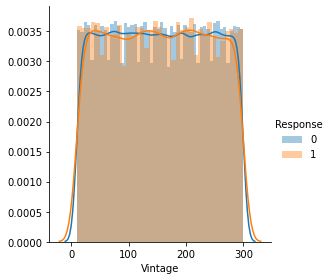

In [44]:
sns.FacetGrid(data = train_data, hue = 'Response', height = 4).map(sns.distplot, 'Vintage').add_legend()
plt.show()

### 3. Data Cleaning and Pre-processing

In [45]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [46]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


#### 3.1. Gender


In [47]:
# train data
X_train_gender = train_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
X_train_gender = X_train_gender.values.reshape(-1, 1)

# test data
X_test_gender = test_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
X_test_gender = X_test_gender.values.reshape(-1, 1)

print(X_train_gender.shape)
print(X_test_gender.shape)

(381109, 1)
(127037, 1)


#### 3.2. Age


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Age'].values.reshape(-1, 1))
X_train_age = scaler.transform(train_data['Age'].values.reshape(-1, 1))
X_test_age = scaler.transform(test_data['Age'].values.reshape(-1, 1))

print(X_train_age.shape)
print(X_test_age.shape)

(381109, 1)
(127037, 1)


In [49]:
# no scaling

X_train_age_n = train_data['Age'].values.reshape(-1, 1)
X_test_age_n = test_data['Age'].values.reshape(-1, 1)

print(X_train_age_n.shape)
print(X_test_age_n.shape)

(381109, 1)
(127037, 1)


#### Feature engineering: new categorical feature for Age

In [50]:
# train data
X_train_age_cat = train_data['Age'].apply(lambda x: 1 if x >= 30 else 0)
X_train_age_cat = X_train_age_cat.values.reshape(-1, 1)

# test data
X_test_age_cat = test_data['Age'].apply(lambda x: 1 if x >= 30 else 0)
X_test_age_cat = X_test_age_cat.values.reshape(-1, 1)

print(X_train_age_cat.shape)
print(X_test_age_cat.shape)

(381109, 1)
(127037, 1)


#### 3.3 Driving License

In [51]:
X_train_license = train_data['Driving_License'].values.reshape(-1, 1)
X_test_license = test_data['Driving_License'].values.reshape(-1, 1)

print(X_train_license.shape)
print(X_test_license.shape)

(381109, 1)
(127037, 1)


#### 3.4 Region Code

In [52]:
# one-hot encoding 'Region code'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Region_Code'].values.reshape(-1, 1))

X_train_region_code = encoder.transform(train_data['Region_Code'].values.reshape(-1, 1))
X_test_region_code = encoder.transform(test_data['Region_Code'].values.reshape(-1, 1))

print(X_train_region_code.shape)
print(X_test_region_code.shape)

(381109, 53)
(127037, 53)


In [53]:
# response encoding

def get_feat_dict(feature):
    value_count = train_data[feature].value_counts() # value counts of each feature
    my_dict = dict()  # initialize a dictionary
    for i, denominator in value_count.items():
        class_count = train_data[(train_data['Response'] == 1) & (train_data[feature] == i)]
        my_dict[i] = round((class_count.shape[0]/denominator), 6)
    return my_dict

In [54]:
region_code_dict = get_feat_dict('Region_Code')
region_code_dict

{28: 0.187163,
 8: 0.096142,
 46: 0.102891,
 41: 0.121776,
 15: 0.071987,
 30: 0.073825,
 29: 0.123362,
 50: 0.062677,
 3: 0.127662,
 11: 0.11276,
 36: 0.079914,
 33: 0.099294,
 47: 0.087682,
 35: 0.124604,
 6: 0.069904,
 45: 0.109723,
 37: 0.079258,
 18: 0.131574,
 48: 0.101901,
 14: 0.090209,
 39: 0.1236,
 10: 0.060128,
 21: 0.071027,
 2: 0.071075,
 13: 0.090188,
 7: 0.131747,
 12: 0.097561,
 9: 0.081587,
 27: 0.074035,
 32: 0.085755,
 43: 0.092459,
 17: 0.07031,
 26: 0.072284,
 25: 0.042749,
 24: 0.141615,
 38: 0.192004,
 0: 0.086096,
 16: 0.066766,
 23: 0.153061,
 31: 0.10051,
 20: 0.115245,
 49: 0.074782,
 4: 0.158245,
 34: 0.075721,
 19: 0.162866,
 22: 0.063407,
 40: 0.118147,
 5: 0.115715,
 1: 0.108135,
 44: 0.040842,
 42: 0.07445,
 52: 0.123596,
 51: 0.153005}

In [55]:
# test 
pkn = train_data['Region_Code'].copy()
pkn = pkn.apply(lambda x: region_code_dict[x]) 
pkn

0         0.187163
1         0.127662
2         0.187163
3         0.112760
4         0.121776
            ...   
381104    0.072284
381105    0.079258
381106    0.073825
381107    0.090209
381108    0.123362
Name: Region_Code, Length: 381109, dtype: float64

In [56]:
# train data
X_train_region_code_resp = train_data['Region_Code'].apply(lambda x: region_code_dict[x])
X_train_region_code_resp = X_train_region_code_resp.values.reshape(-1, 1)

# test data
X_test_region_code_resp = test_data['Region_Code'].apply(lambda x: region_code_dict[x] if x in region_code_dict.keys() 
                                                                                       else np.median(list(region_code_dict.values())))
X_test_region_code_resp = X_test_region_code_resp.values.reshape(-1, 1)

print(X_train_region_code_resp.shape)
print(X_test_region_code_resp.shape)

(381109, 1)
(127037, 1)


#### 3.5 Previously Insured

In [57]:
X_train_prev_ins = train_data['Previously_Insured'].values.reshape(-1, 1)
X_test_prev_ins = test_data['Previously_Insured'].values.reshape(-1, 1)

print(X_train_prev_ins.shape)
print(X_test_prev_ins.shape)

(381109, 1)
(127037, 1)


#### 3.6 Vehicle Age

In [58]:
# one-hot encoding 'Vehicle Age'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Vehicle_Age'].values.reshape(-1, 1))

X_train_vehicle_age = encoder.transform(train_data['Vehicle_Age'].values.reshape(-1, 1))
X_test_vehicle_age = encoder.transform(test_data['Vehicle_Age'].values.reshape(-1, 1))

print(X_train_vehicle_age.shape)
print(X_test_vehicle_age.shape)

(381109, 3)
(127037, 3)


#### label encoding 'Vehicle Age'

In [59]:
X_train_vehicle_age_n = train_data['Vehicle_Age'].replace({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
X_train_vehicle_age_n = X_train_vehicle_age_n.values.reshape(-1, 1)

X_test_vehicle_age_n = test_data['Vehicle_Age'].replace({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
X_test_vehicle_age_n = X_test_vehicle_age_n.values.reshape(-1, 1)

#### Response coding

In [60]:
vehicle_age_dict = get_feat_dict('Vehicle_Age')
vehicle_age_dict

{'1-2 Year': 0.173755, '< 1 Year': 0.043705, '> 2 Years': 0.293746}

In [61]:
X_train_vehicle_age_resp = train_data['Vehicle_Age'].apply(lambda x: vehicle_age_dict[x])
X_train_vehicle_age_resp = X_train_vehicle_age_resp.values.reshape(-1, 1)

X_test_vehicle_age_resp = test_data['Vehicle_Age'].apply(lambda x: vehicle_age_dict[x])
X_test_vehicle_age_resp = X_test_vehicle_age_resp.values.reshape(-1, 1)

print(X_train_vehicle_age_resp.shape)
print(X_test_vehicle_age_resp.shape)

(381109, 1)
(127037, 1)


#### 3.7 Vehicle Damage

In [62]:
# train data
X_train_damage = train_data['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train_damage = X_train_damage.values.reshape(-1, 1)

# test data
X_test_damage = test_data['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
X_test_damage = X_test_damage.values.reshape(-1, 1)

print(X_train_damage.shape)
print(X_test_damage.shape)

(381109, 1)
(127037, 1)


#### 3.8 Annual Premium

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Annual_Premium'].values.reshape(-1, 1))
X_train_premium = scaler.transform(train_data['Annual_Premium'].values.reshape(-1, 1))
X_test_premium = scaler.transform(test_data['Annual_Premium'].values.reshape(-1, 1))

print(X_train_premium.shape)
print(X_test_premium.shape)

(381109, 1)
(127037, 1)


In [64]:
# no scale

X_train_premium_n = train_data['Annual_Premium'].values.reshape(-1, 1)
X_test_premium_n =  test_data['Annual_Premium'].values.reshape(-1, 1)

print(X_train_premium_n.shape)
print(X_test_premium_n.shape)

(381109, 1)
(127037, 1)


#### 3.9 Policy Sales Channel

In [65]:
# one-hot encoding 'Policy_Channel'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(train_data['Policy_Sales_Channel'].values.reshape(-1, 1))

X_train_sales_chnl = encoder.transform(train_data['Policy_Sales_Channel'].values.reshape(-1, 1))
X_test_sales_chnl = encoder.transform(test_data['Policy_Sales_Channel'].values.reshape(-1, 1))

print(X_train_sales_chnl.shape)
print(X_test_sales_chnl.shape)

(381109, 155)
(127037, 155)


#### Response encoding

In [66]:
sales_chnl_dict = get_feat_dict('Policy_Sales_Channel')
sales_chnl_dict

{152: 0.028624,
 26: 0.199385,
 124: 0.189148,
 160: 0.02181,
 156: 0.215458,
 122: 0.173212,
 157: 0.268402,
 154: 0.245954,
 151: 0.031403,
 163: 0.304183,
 13: 0.147453,
 25: 0.199675,
 7: 0.113892,
 8: 0.082508,
 30: 0.110638,
 55: 0.149525,
 155: 0.320097,
 11: 0.089776,
 1: 0.032588,
 52: 0.109005,
 125: 0.123782,
 15: 0.087838,
 29: 0.125741,
 12: 0.168582,
 120: 0.084525,
 24: 0.132,
 31: 0.253566,
 14: 0.101286,
 153: 0.059308,
 61: 0.096718,
 16: 0.086042,
 3: 0.304015,
 60: 0.102515,
 4: 0.200393,
 158: 0.27439,
 23: 0.137441,
 22: 0.054217,
 150: 0.24359,
 10: 0.189394,
 19: 0.085586,
 136: 0.216216,
 147: 0.184783,
 109: 0.12,
 145: 0.132184,
 9: 0.100592,
 18: 0.035928,
 91: 0.183544,
 116: 0.116883,
 37: 0.098684,
 21: 0.081081,
 139: 0.090909,
 128: 0.094891,
 42: 0.19697,
 59: 0.19685,
 138: 0.096774,
 131: 0.115702,
 127: 0.072727,
 140: 0.065421,
 113: 0.067308,
 119: 0.048544,
 44: 0.19802,
 135: 0.089109,
 54: 0.16,
 64: 0.05618,
 133: 0.047059,
 148: 0.103896,
 35

In [67]:
# test 
pkn = train_data['Policy_Sales_Channel'].copy()
pkn = pkn.apply(lambda x: sales_chnl_dict[x]) 
pkn

0         0.199385
1         0.199385
2         0.199385
3         0.028624
4         0.028624
            ...   
381104    0.199385
381105    0.028624
381106    0.021810
381107    0.189148
381108    0.199385
Name: Policy_Sales_Channel, Length: 381109, dtype: float64

In [68]:
X_train_sales_chnl_resp = train_data['Policy_Sales_Channel'].apply(lambda x: sales_chnl_dict[x])
X_train_sales_chnl_resp = X_train_sales_chnl_resp.values.reshape(-1, 1)

X_test_sales_chnl_resp = test_data['Policy_Sales_Channel'].apply(lambda x: sales_chnl_dict[x] if x in sales_chnl_dict.keys() 
                                                                                              else np.median(list(sales_chnl_dict.values())))
X_test_sales_chnl_resp = X_test_sales_chnl_resp.values.reshape(-1, 1)

print(X_train_sales_chnl_resp.shape)
print(X_test_sales_chnl_resp.shape)

(381109, 1)
(127037, 1)


#### 3.10 Vintage

In [69]:
scaler = MinMaxScaler()
scaler.fit(train_data['Vintage'].values.reshape(-1, 1))
X_train_vintage = scaler.transform(train_data['Vintage'].values.reshape(-1, 1))
X_test_vintage = scaler.transform(test_data['Vintage'].values.reshape(-1, 1))

print(X_train_vintage.shape)
print(X_test_vintage.shape)

(381109, 1)
(127037, 1)


In [70]:
# no scaling

X_train_vintage_n = train_data['Vintage'].values.reshape(-1, 1)
X_test_vintage_n =  test_data['Vintage'].values.reshape(-1, 1)

print(X_train_vintage_n.shape)
print(X_test_vintage_n.shape)

(381109, 1)
(127037, 1)


### 4. Stacking all the features together 

#### Set 1: Label encoded + One hot encoded categorical features + scaled numerical features

In [71]:
y_train = train_data['Response'].values

In [72]:
from scipy.sparse import hstack

X_train_ohe = hstack((X_train_gender, X_train_age, X_train_license, X_train_region_code, X_train_prev_ins, 
                       X_train_vehicle_age, X_train_damage, X_train_premium, X_train_sales_chnl, X_train_vintage))

X_test_ohe = hstack((X_test_gender, X_test_age, X_test_license, X_test_region_code, X_test_prev_ins, 
                      X_test_vehicle_age, X_test_damage, X_test_premium, X_test_sales_chnl, X_test_vintage)) 

print("train data shape:", (X_train_ohe.shape, y_train.shape))
print("test data shape:", X_test_ohe.shape)

train data shape: ((381109, 218), (381109,))
test data shape: (127037, 218)


#### Set 2: Label encoded + Response encoded categorical features + numerical features

In [73]:
X_train_r = np.hstack((X_train_gender, X_train_age_n, X_train_age_cat, X_train_license, X_train_region_code_resp, X_train_prev_ins, 
                       X_train_vehicle_age_resp, X_train_damage, X_train_premium_n, X_train_sales_chnl_resp, X_train_vintage_n))

X_test_r = np.hstack((X_test_gender, X_test_age_n, X_test_age_cat, X_test_license, X_test_region_code_resp, X_test_prev_ins, 
                      X_test_vehicle_age_resp, X_test_damage, X_test_premium_n, X_test_sales_chnl_resp, X_test_vintage_n)) 

print("train data shape:", (X_train_r.shape, y_train.shape))
print("test data shape:", X_test_r.shape)

train data shape: ((381109, 11), (381109,))
test data shape: (127037, 11)


### 5. Building Machine Learning Models
##### (With Set 1 features)

#### 5.1 Logistic Regression using SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

sgd = SGDClassifier(loss = 'log', class_weight = 'balanced') # default penalty is L2 
parameter = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

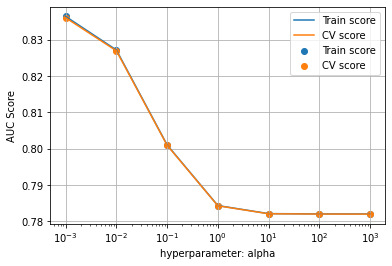

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

#### With only L1 regularization

In [ ]:
sgd = SGDClassifier(loss = 'log', class_weight = 'balanced',  l1_ratio = 1 ) 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True, l1_ratio=1,
                                     learning_rate='optimal', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

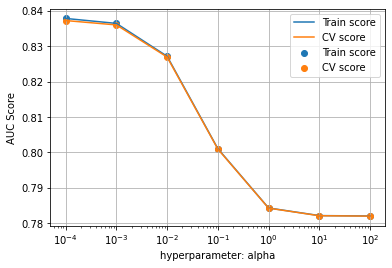

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

#### 5.2 Linear SVM Classifier using SGD

In [ ]:
sgd = SGDClassifier(loss = 'hinge', class_weight = 'balanced') 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scori

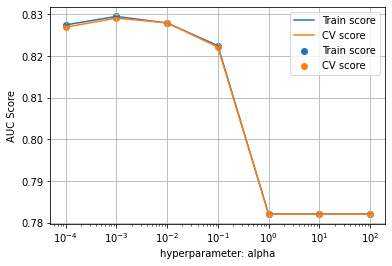

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

#### Logistic Regression with default parameters

In [ ]:
from sklearn.metrics import roc_auc_score

sgd_clf = SGDClassifier(loss = 'log', class_weight= 'balanced', random_state = 42) # default penalty is L2
sgd_clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(sgd_clf, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8384389356104578


In [ ]:
sgd_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
sgd_df.head()

,id,Response
0,381110,0.005470
1,381111,0.320437
2,381112,0.279726
3,381113,0.113913
4,381114,0.003850


In [ ]:
sgd_df.to_csv(my_path + 'logistic_sgd_l2_10e-4.csv', index = False)

##### Without Region code, Policy Sales Channel and Driving license features (Experimental set)

In [ ]:
from scipy.sparse import hstack

X_train1 = hstack((X_train_gender, X_train_age, X_train_prev_ins, 
                  X_train_vehicle_age, X_train_damage, X_train_premium, X_train_vintage))

X_test1 = hstack((X_test_gender, X_test_age, X_test_prev_ins, 
                  X_test_vehicle_age, X_test_damage, X_test_premium,X_test_vintage)) 

print(X_train1.shape, y_train.shape) 
print(X_test1.shape)        

(381109, 9) (381109,)
(127037, 9)


In [ ]:
sgd = SGDClassifier(loss = 'log', class_weight = 'balanced', random_state = 42) # default penalty is L2 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train1, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True, l1_ratio=1,
                                     learning_rate='optimal', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=42, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

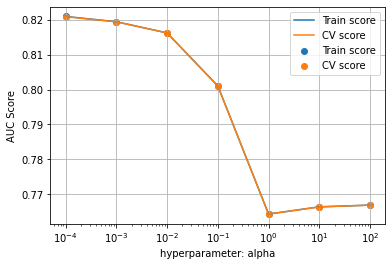

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

#### 5.3. Multinomial Naive Bayes 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mul_NB = MultinomialNB() 
parameters = {'alpha' :[0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(mul_NB, parameters, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

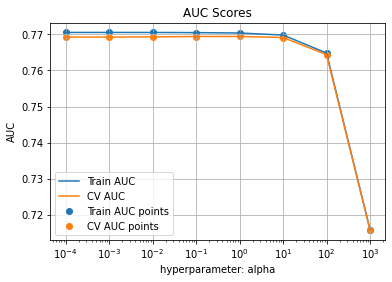

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
plt.plot(parameters['alpha'], train_auc, label = 'Train AUC')
plt.plot(parameters['alpha'], cv_auc, label = 'CV AUC')

plt.scatter(parameters['alpha'], train_auc, label = 'Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label = 'CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC")
plt.title("AUC Scores")
plt.grid()
plt.show()

#### 5.4. Baseline RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

In [ ]:
print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.9999986429704083


As we can see, this is highly overfitting. We need to hyperparameter tuining to reduce overfitting.

In [ ]:
rfc_baseline_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
rfc_baseline_df.head()

,id,Response
0,381110,0.053837
1,381111,0.318576
2,381112,0.090398
3,381113,0.220024
4,381114,0.053837


In [ ]:
rfc_baseline_df.to_csv(my_path + 'rfc_baseline_ohe.csv', index = False)

#### Random Forest (without hyperparameter tuning)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 250, max_depth = 15, random_state = 101, n_jobs = -1) 
rfc.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8706699397824769


In [ ]:
rfc_notuning_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
rfc_notuning_df.head()

,id,Response
0,381110,0.013672
1,381111,0.304592
2,381112,0.288714
3,381113,0.040469
4,381114,0.013856


In [ ]:
rfc_notuning_df.to_csv(my_path + 'rfc_notuning_ohe.csv', index = False)

#### 5.5. XGBoost Classifier (without hyperparameter tuning)

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 150, max_depth = 11, colsample_bytree = 0.6, class_ n_jobs = -1, random_state = 21)
xgb.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8890019875244968


There values of hypermeter are from my previous experience. We still need to do hyperparameter tuning for a better optimal solution. 

In [ ]:
xgb_notuning_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
xgb_notuning_df.head()

,id,Response
0,381110,0.026612
1,381111,0.279585
2,381112,0.246641
3,381113,0.075442
4,381114,0.026452


In [ ]:
xgb_notuning_df.to_csv(my_path + 'xgb_notuning_ohe.csv', index = False)

### 6. Building Machine Learning Models
#### With Set 2 features

In [ ]:
# roc plot 
from sklearn.metrics import auc

def plot_ROC(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.3f)' % roc_auc, alpha = 0.7)
    plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', alpha = 0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.grid()
    plt.xlabel('False Positive Rate', fontsize = 12)
    plt.ylabel('True Positive Rate', fontsize = 12)
    plt.title('Receiver Operating Characteristic', fontsize = 16)
    plt.legend(loc = "lower right", fontsize = 12)
    plt.show()

#### 6.1 LightGBM (without hyperparameter tuning)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV

LGB_model = LGBMClassifier(max_depth = 8, n_estimators = 300, reg_lambda = 1.2, reg_alpha = 1.2, min_child_weight = 1, verbose  = 1,
                          learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.6, eval_metric = 'auc', is_higher_better = 1, plot = True)
LGB_model.fit(X_train_r, y_train)
sig_clf = CalibratedClassifierCV(LGB_model, method = "sigmoid")
sig_clf.fit(X_train_r, y_train)

y_pred_train = sig_clf.predict_proba(X_train_r)
y_pred_test = sig_clf.predict_proba(X_test_r)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8685927288915909


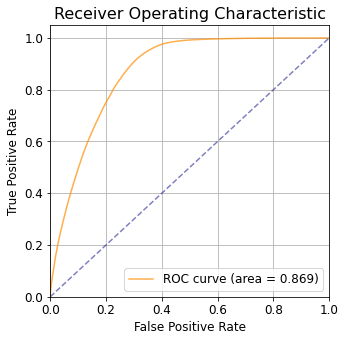

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train[:, 1])
plot_ROC(fpr, tpr)

In [ ]:
lightgbm_notuning_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
lightgbm_notuning_df.head()

,id,Response
0,381110,0.026455
1,381111,0.314695
2,381112,0.260928
3,381113,0.076663
4,381114,0.025671


In [ ]:
lightgbm_notuning_df.to_csv(my_path + 'lightgbm_notuning_resp_feats.csv', index = False)

#### 6.2 XGBoost Classifier (without hyperparameter tuning)

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(n_estimators = 150, max_depth = 11, colsample_bytree = 0.6, n_jobs = -1, random_state = 21)
xgb.fit(X_train_r, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train_r, y_train)

y_pred_train = sig_clf.predict_proba(X_train_r)
y_pred_test = sig_clf.predict_proba(X_test_r)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.9047303386039507


In [ ]:
xgb_notuning_resp_feats = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
xgb_notuning_resp_feats.head()

,id,Response
0,381110,0.028510
1,381111,0.433677
2,381112,0.274555
3,381113,0.071792
4,381114,0.027961


In [ ]:
xgb_notuning_resp_feats.to_csv(my_path + 'xgb_notuning_resp_feats.csv', index = False)

In [ ]:
xgb_notuning_nocal_resp.to_csv(my_path + 'xgb_notuning_nocal_resp.csv', index = False)

#### 6.3 XGBoost Classifier (with hyperparameter tuning)

In [ ]:
'''
XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, 
              objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, 
              gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
              colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
              base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
'''

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_jobs = -1, random_state = 21)
params = {'n_estimators': [50, 100, 150, 250, 500], 
          'max_depth': [3, 5, 7, 11, 15]}
clf = GridSearchCV(xgb, params, scoring = 'roc_auc', cv = 3, return_train_score = True, n_jobs = -1)
clf.fit(X_train_r, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=21, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 11, 15],
                         'n_estimators': [50, 100, 150, 250, 500]},
             pre_dispatch='2*n_jobs', refit=True, re

In [ ]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=21,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

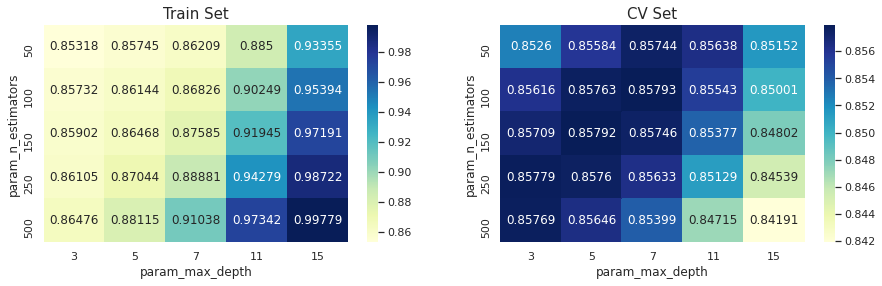

In [ ]:
# plot the performance of model both on train data and cross validation data for each hyper parameter using a Seaborn Heatmap
# reference -> https://kavisekhon.com/Grid%20Search.html

sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(
            ['param_n_estimators', 'param_max_depth']).max().unstack()[
            ['mean_train_score', 'mean_test_score']]

fig, ax = plt.subplots(1,2, figsize = (15, 4))
sns.heatmap(max_scores.mean_train_score, annot = True, ax = ax[0], fmt = '.5g', cmap = "YlGnBu")
sns.heatmap(max_scores.mean_test_score, annot = True, ax = ax[1], fmt ='.5g', cmap = "YlGnBu")

ax[0].set_title('Train Set', fontsize = 15)
ax[1].set_title('CV Set', fontsize = 15)
plt.show()

#### n = 100, max_depth = 7
Let's tune subsample and colsample by tree

In [ ]:
xgb = XGBClassifier(n_estimators = 100, max_depth = 7, n_jobs = -1, random_state = 21)
params = {'subsample': [0.5, 1], 
          'colsample_bytree': [0.4, 0.6, 0.8, 1]}
clf = GridSearchCV(xgb, params, scoring = 'roc_auc', cv = 3, return_train_score = True, n_jobs = -1)
clf.fit(X_train_r, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=7, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=21, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1],
                         'subsample': [0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [ ]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=21,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

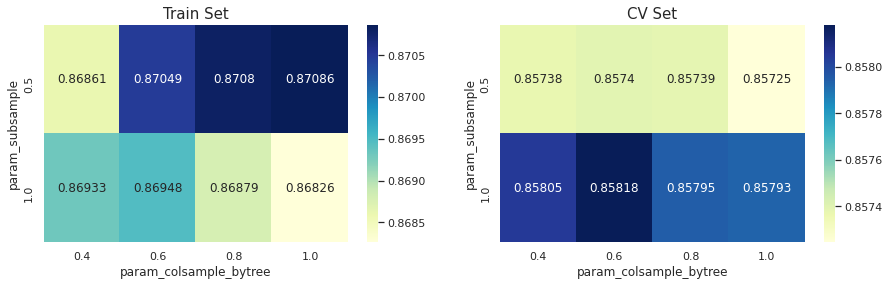

In [ ]:
max_scores = pd.DataFrame(clf.cv_results_).groupby(
            ['param_subsample', 'param_colsample_bytree']).max().unstack()[
            ['mean_train_score', 'mean_test_score']]

fig, ax = plt.subplots(1,2, figsize = (15, 4))
sns.heatmap(max_scores.mean_train_score, annot = True, ax = ax[0], fmt = '.5g', cmap = "YlGnBu")
sns.heatmap(max_scores.mean_test_score, annot = True, ax = ax[1], fmt ='.5g', cmap = "YlGnBu")

ax[0].set_title('Train Set', fontsize = 15)
ax[1].set_title('CV Set', fontsize = 15)
plt.show()

#### Optimal hyperparams: n_estimators = 100, max_depth = 7, subsample = 1, colsample_bytree = 0.6


In [ ]:
xgb = XGBClassifier(n_estimators = 100, max_depth = 7, subsample = 1, colsample_bytree = 0.6, n_jobs = -1, random_state = 21)
xgb.fit(X_train_r, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train_r, y_train)

y_pred_train = sig_clf.predict_proba(X_train_r)
y_pred_test = sig_clf.predict_proba(X_test_r)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.866605555071906


In [ ]:
xgb_new100_7point6_cal1 = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
xgb_new100_7point6_cal1.head()

,id,Response
0,381110,0.020910
1,381111,0.273738
2,381112,0.281243
3,381113,0.022044
4,381114,0.020899


In [ ]:
xgb_new100_7point6_cal.to_csv(my_path + 'xgb_new100_7point6_cal1.csv', index = False)